<a href="https://colab.research.google.com/github/singhsourav0/Deep-Learning-Odyssey/blob/main/8_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="cyan">Q:- Why we need to use Feature Scaling in my model?</font></h1>
<h4><font color="teal">In any ANN model if the features are scaled diffrent(Unnormalized Feature) means one input column are not related to other column then to train our model is very hard so we scaled the input column with Standardization or Normalisation(input scaling).</br>
lets understand with examples if we have 2 input column 1 is age and the other is salary then the range of 2nd column is so wide and not related to column 1. </br>
In this case when we try to train our model then it will stuck in specific range of loss.
and stop reducing the loss and for overcome from this issue we use feature scaling.</br>
Now lets break the concept to understand when we use Standardization or normalisation.</font></h4>

1. <h3><font color="yellow"><b>Standardization (Z-score normalization):</b></font>

   Standardization scales the features such that they have a mean of 0 and a standard deviation of 1. It transforms the data distribution to have a mean of 0 and a standard deviation of 1.

   By standardizing the features, we ensure that they have similar scales, which can help algorithms converge faster and make them less sensitive to the scale of features. the range of data  after scaled is -1 t0 +1.

2. <h3><font color="yellow"><b>Normalization (Min-Max Scaling):</b></font>

   Normalization scales the features to a fixed range, typically between 0 and 1. It preserves the relative relationships between values in the original data.

   Normalization is useful when the features have different ranges and we want to scale them to a common range, typically 0 to 1. It's beneficial for algorithms that require features to be on the same scale.

Both standardization and normalization are beneficial for various machine learning algorithms such as k-nearest neighbors (KNN), support vector machines (SVM), and neural networks.

<img src="https://raw.githubusercontent.com/singhsourav0/Deep-Learning-Odyssey/main/rrrr.jpg" width="700" height="300">

 <h4><font color="teal">sourav kumar(singhsourav0)</font></h4>

In [1]:
import numpy as np
import pandas as pd

In [ ]:
!wget

In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

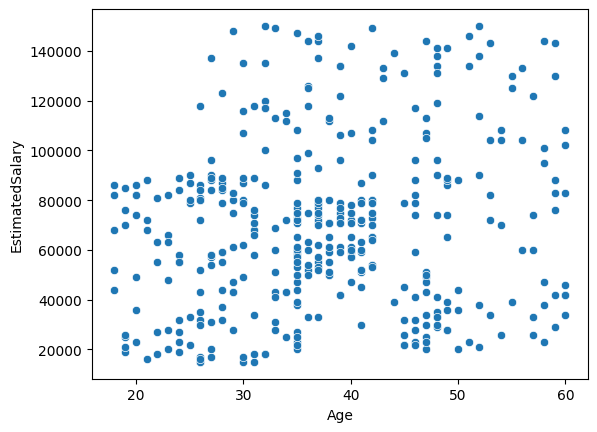

In [8]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])
# sns.scatterplot(df.iloc[:,0],df.iloc[:,1])

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 30ms/step - loss: 405.6186 - accuracy: 0.4781 - val_loss: 354.4272 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 166.0576 - accuracy: 0.4906 - val_loss: 124.0222 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 141.6576 - accuracy: 0.5031 - val_loss: 4.9716 - val_accuracy: 0.6500
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 62.2307 - accuracy: 0.5219 - val_loss: 134.4708 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 62.5766 - accuracy: 0.5594 - val_loss: 29.8704 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 32.7961 - accuracy: 0.5437 - val_loss: 53.0586 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 48.3598 - accuracy: 0.5406 - val_loss: 60.9723 - val_accuracy: 

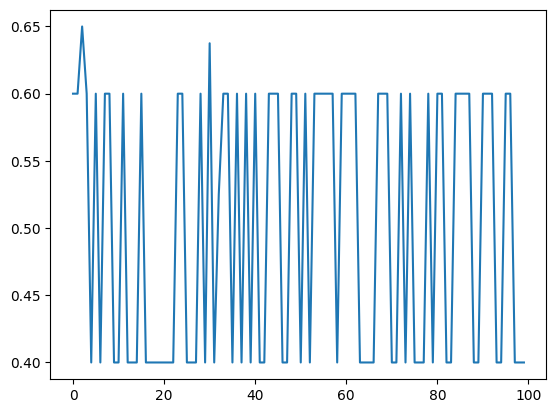

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [17]:
# Applying scaling

:

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

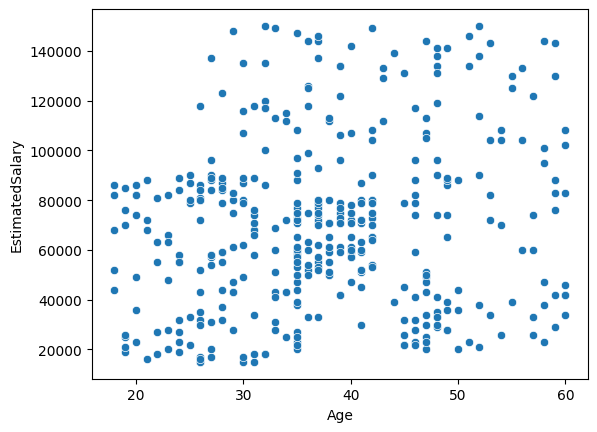

In [22]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [23]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 30ms/step - loss: 0.6636 - accuracy: 0.7469 - val_loss: 0.6265 - val_accuracy: 0.8250
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.8281 - val_loss: 0.5740 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5669 - accuracy: 0.8406 - val_loss: 0.5292 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5264 - accuracy: 0.8438 - val_loss: 0.4919 - val_accuracy: 0.8125
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4933 - accuracy: 0.8500 - val_loss: 0.4603 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4647 - accuracy: 0.8469 - val_loss: 0.4326 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4394 - accuracy: 0.8469 - val_loss: 0.4100 - val_accuracy: 0.8125
Epoch 8/100


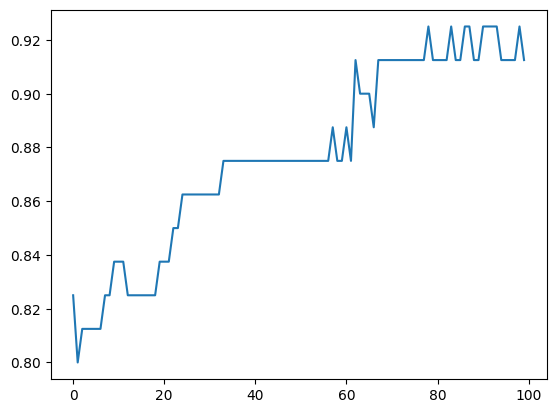

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])